<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Avance%20Informe%20SubArrayMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Problema de Optimización**


Los problemas de optimización son de los más comunes que se pueden encontrar en cualquier tipo de trabajo. Estos buscan la **máxima eficiencia** para la resolución de problemas, en otras palabras, maximizan o minimizan el valor de una función.

El problema planteado en este informe es el de buscar el **sub arreglo** que contiene la **máxima suma** de valores de los elementos de un arreglo de largo **n**.

A continuación se presentan la entrada y salida esperada para este problema:

**Entrada**: Arreglo de **n** datos comparables.

**Salida**: **Sub-arreglo** que va desde **i** hasta **j** siendo **i<j<n** y cuya suma de valores sea mayor o igual a la suma de los elementos de los demás sub-arreglos que se pueden formar desde el arreglo original.

### **1.1 Ejemplo**

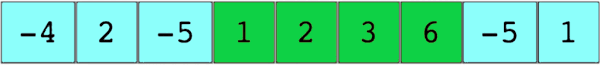

En la imagen se muestra un arreglo de números enteros de largo **n=9** donde el máximo sub-arreglo se marca en **color verde**, el cual va desde **arreglo[3]** hasta **arreglo[6]**, donde la **suma** de sus elementos (máxima) es **12**.

Cumpliendo con lo descrito anteiormente, **no existe un sub-arreglo cuya sumatoria de sus elementos sea mayor a 12**.

#**2. Descripción del Sub-Arreglo Máximo**

El algortimo recibe como parametro un arreglo o lista con **n** elementos comparables y retornará el sub-arreglo con la suma máxima de elementos.

1. El algoritmo se implementa de forma recursiva, divide al arreglo en 2 sub arreglos de largo N/2.
2. Se repite el paso 1 hasta obtener cada elemento del arreglo en un sub-arreglo independiente.
3. Se busca el sub-arreglo máximo de cada mitad recursivamente.
4. Luego se busca el sub array máximo que incluye al medio del arreglo.
5. Se retorna el máximo sub-arreglo encontrado.



In [3]:
import math
import random
from termcolor import colored

# Función obtiene el máximo subarreglo que cruza por el medio.
def maxMidSubArray(arr, mid, verbose):
  sum = 0
  maxLeft = -math.inf
  low = 0  # Guarda la posición inicial del máximo subarreglo.

  # Se obtiene subArreglo mas grande de la izquierda.
  for i in range(mid - 1, -1, -1):
    sum = sum + arr[i]
    
    if (sum > maxLeft):
       maxLeft = sum
       low = i
  
  sum = 0
  maxRight = -math.inf
  high = len(arr) - 1 # Guarda la posición final del máximo subarreglo.
  
  # Se obtiene el subarreglo maximo de la derecha.
  for i in range (mid, len(arr)):
    sum = sum + arr[i]
    if (sum > maxRight):
      maxRight = sum
      high = i
  if (verbose == True):
    print("Suma izquierda:", maxLeft)
    print("Suma derecha:", maxRight)

  maxSum = maxLeft + maxRight

  # Si verbose es True, se muestran el subarreglo mayor que cruza por el medio.
  if (verbose == True):
    
    if (len (arr[low:high + 1]) > 1):
      print ("Maximo Subarreglo que pasa por el medio: ", colored(f"{str(arr[low: high-1])[1:-1]}","blue"), ",", colored(f"{str(arr[high-1:high + 1])[1:-1]}","blue"), "\n")
    
    else:
      print ("Máximo subarreglo que pasa por el medio: ", colored(f"{str(arr[low: high])[1:-1]}","blue"), "\n")

  return ((maxLeft + maxRight), low, high)

# Función que obtiene el máximo subarreglo de manera recursiva.
def maxSubArray(arr, low, high, verbose):
  n = len (arr)
  
  # Caso base.
  if (n == 1):
    return (arr[0], low, low)

  # Se obtiene la mitad.
  mid = n//2

  # Subarreglo Izquierdo y derecho.
  leftArr = arr[: mid]
  rightArr = arr[mid : ]

  # Si verbose es True se muestran los subarreglos.
  if (verbose == True):
        print("SubArreglo Izquierdo: ", leftArr)
        print("SubArreglo Derecho: ", rightArr, "\n")
  
  # Se obtiene la suma máxima del subarreglo izquierdo y el indice de comienzo y fin.
  maxLeft, lowLeft, highLeft = maxSubArray(leftArr, low, mid - 1, verbose)
  
  # Se obtiene la suma máxima del subarreglo derecho y el indice de comienzo y fin.
  maxRight, lowRight, highRight = maxSubArray(rightArr, mid + 1, high, verbose)
  
  # Se obtiene la suma máxima del subarreglo que pasa por el centro.
  # y el indice de comienzo y fin.
  maxMid, lowMid, highMid = maxMidSubArray(arr, mid, verbose)

  # Se obtiene la máxima suma.
  maxSum = max (maxLeft, maxRight, maxMid)
  
  # Si el suma maxima es el subarreglo que pasa por el medio.
  if (maxSum == maxMid): 
    return maxSum, lowMid, highMid

  # Si el suma maxima es el subarreglo de la derecha.
  elif (maxSum == maxRight):
    return maxSum, lowRight, highRight

  # Si el suma maxima es el subarreglo de la izquierda.
  elif (maxSum == maxLeft):
    return maxSum, lowLeft, highLeft

a = random.sample(range(-100, 100), 6)
print("Arreglo de entrada: ", a)
b, i, j = maxSubArray(a, 0, len(a) - 1, verbose = True)
print ("La suma maxima es: ", b)
print ("El arreglo comienza en la posición", i, "y termina en la posición", j)


Arreglo de entrada:  [76, 8, 70, -37, 5, -72]
SubArreglo Izquierdo:  [76, 8, 70]
SubArreglo Derecho:  [-37, 5, -72] 

SubArreglo Izquierdo:  [76]
SubArreglo Derecho:  [8, 70] 

SubArreglo Izquierdo:  [8]
SubArreglo Derecho:  [70] 

Suma izquierda: 8
Suma derecha: 70
Maximo Subarreglo que pasa por el medio:   , 8, 70 

Suma izquierda: 76
Suma derecha: 78
Maximo Subarreglo que pasa por el medio:  76 , 8, 70 

SubArreglo Izquierdo:  [-37]
SubArreglo Derecho:  [5, -72] 

SubArreglo Izquierdo:  [5]
SubArreglo Derecho:  [-72] 

Suma izquierda: 5
Suma derecha: -72
Maximo Subarreglo que pasa por el medio:   , 5, -72 

Suma izquierda: -37
Suma derecha: 5
Maximo Subarreglo que pasa por el medio:   , -37, 5 

Suma izquierda: 154
Suma derecha: -32
Maximo Subarreglo que pasa por el medio:  76, 8, 70 , -37, 5 

La suma maxima es:  154
El arreglo comienza en la posición 0 y termina en la posición 2
